In [64]:
import pandas as pd
import matplotlib.pyplot as plt

In [65]:
df = pd.read_csv("books.csv")

In [66]:
df.head()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url,NonEnglish
0,15,48855,48855,3532896,710,553296981,9.780553e+12,"Anne Frank, Eleanor Roosevelt, B.M. Mooyaart-D...",1947.0,Het Achterhuis: Dagboekbrieven 14 juni 1942 - ...,...,2024493,20825,45225,91270,355756,656870,875372,https://images.gr-assets.com/books/1358276407m...,https://images.gr-assets.com/books/1358276407s...,0
1,40,19501,19501,3352398,185,143038419,9.780143e+12,Elizabeth Gilbert,2006.0,"Eat, pray, love: one woman's search for everyt...",...,1206597,49714,100373,149549,310212,332191,314272,https://images.gr-assets.com/books/1503066414m...,https://images.gr-assets.com/books/1503066414s...,0
2,81,7445,7445,2944133,92,074324754X,9.780743e+12,Jeannette Walls,2005.0,The Glass Castle,...,637866,40777,7901,18922,85191,227750,298102,https://images.gr-assets.com/books/1400930557m...,https://images.gr-assets.com/books/1400930557s...,0
3,82,1845,1845,3284484,108,385486804,9.780385e+12,Jon Krakauer,1996.0,Into the Wild,...,665377,17299,19229,35567,135199,248287,227095,https://images.gr-assets.com/books/1403173986m...,https://images.gr-assets.com/books/1403173986s...,0
4,87,1617,1617,265616,109,374500010,9.780375e+12,"Elie Wiesel, Marion Wiesel",1958.0,Un di Velt Hot Geshvign,...,707879,22001,7761,18539,90575,230227,360777,https://images.gr-assets.com/books/1473495285m...,https://images.gr-assets.com/books/1473495285s...,0


# Q1

In [67]:
rows, cols = df.shape
print(f"Number of rows: {rows}")
print(f"Number of columns: {cols}")

Number of rows: 399
Number of columns: 24


# Q2

In [68]:
count_books_no_title = df["original_title"].isna().sum()
print(f"Number of books without original title: {count_books_no_title}")

Number of books without original title: 36


# Q3

In [69]:
df_cleaned = df.dropna(subset = ["original_title"])
count_unique_books = df_cleaned["book_id"].nunique()
print(f"Number of unique books: {count_unique_books}")

Number of unique books: 363


# Q4

In [70]:
average_rating = df["average_rating"].mean()
print(f"Average rating of all books: {average_rating}")

Average rating of all books: 3.9837844611528817


# Q5

In [71]:
print(df["original_publication_year"].dtype)

float64


In [72]:
count_books_publish_year_2000 = (df["original_publication_year"] == 2000).sum()
print(f"Number of books published in the year 2000: {count_books_publish_year_2000}")

Number of books published in the year 2000: 8


# Q6

In [73]:
max_rating = df["work_ratings_count"].max()
titles_having_max_rating = df[df["work_ratings_count"] == max_rating]["title"]
print(f"Books having maximum number of rating of {max_rating}:")
for title in titles_having_max_rating:
    print(title)

Books having maximum number of rating of 2024493:
The Diary of a Young Girl


# Q7

In [74]:
def create_rating_buckets(max_rating, increment = 0.5):
    buckets = []
    start = 0
    while start <= max_rating:
        buckets.append(start)
        start += increment
    return buckets

In [75]:
buckets = create_rating_buckets(5)
print(buckets)

[0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]


In [76]:
rating_buckets = pd.cut(df["average_rating"], bins = buckets, right = False)
count_rating = rating_buckets.value_counts().sort_index()
print(count_rating)

average_rating
[0.0, 0.5)      0
[0.5, 1.0)      0
[1.0, 1.5)      0
[1.5, 2.0)      0
[2.0, 2.5)      0
[2.5, 3.0)      0
[3.0, 3.5)      7
[3.5, 4.0)    191
[4.0, 4.5)    199
[4.5, 5.0)      2
Name: count, dtype: int64


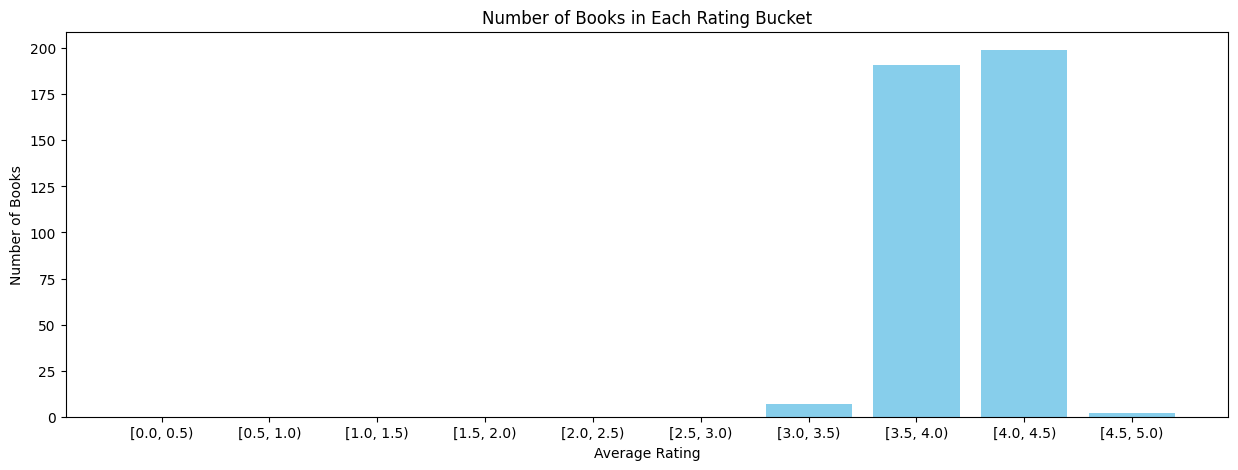

In [77]:
plt.figure(figsize=(15,5))
plt.bar(count_rating.index.astype(str), count_rating.values, color='skyblue')
plt.xlabel('Average Rating')
plt.ylabel('Number of Books')
plt.title('Number of Books in Each Rating Bucket')
plt.show()